# Model Checking


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from load_utils import *

In [2]:
d = load_diffs(keep_diff = True)
df_events, df_blocked_user_text = load_block_events_and_users()

### Q: How does the distribution over attack probabilities compare across annotators vs models?

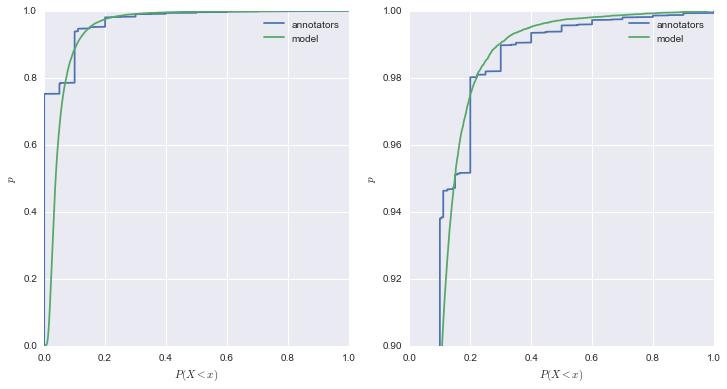

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 1. * np.arange(len(x)) / (len(x) - 1)

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 1. * np.arange(len(x)) / (len(x) - 1)

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$P(X<x)$')
ax1.set_ylabel('$p$')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$P(X<x)$')
ax2.set_ylabel('$p$')
ax2.set_ylim((0.90, 1))
ax2.legend()

Model does not assign 0 scores, like the annotators.
Model score distribution is skewed left for x > 0.2.

### Q: How do differences in distribution over attack probabilities between annotators and models impact estomates of prevalence of personal attacks?

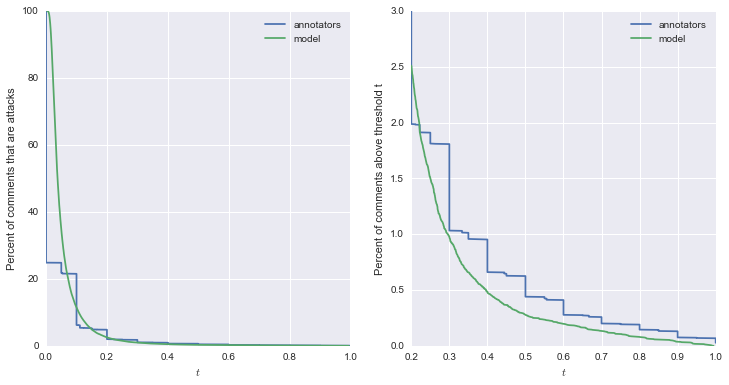

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 100 * (1 - (1. * np.arange(len(x)) / (len(x) - 1)))

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 100 * (1 - (1. * np.arange(len(x)) / (len(x) - 1)))

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$t$')
ax1.set_ylabel('Percent of comments that are attacks')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Percent of comments above threshold t')
ax2.set_ylim((0.0, 3))
ax2.set_xlim((0.2, 1.0))
ax2.legend()
plt.savefig('../../paper/figs/model_vs_annotator_percent_attack_distributions.png')

### Q: What do comments in different score intervals look like?

In [47]:
def check_range(d, col, min, max, n = 10, ):
    df = d.query('%s >= %f and %s <= %f' % (col, min, col, max))
    for i, r in df.sample(n).iterrows():
        print(r[col])
        print(r.clean_diff)
        print('\n')  

In [48]:
check_range(d['sample'], 'pred_aggression_score',0.5, 1.0)

0.9563558525405824
SOULJA BOY SUCKS DICK!!!!!!


0.7653057798743248
Shut up, you button!
  


0.9757505813613534
 YOUR an A-HOLE! 

F- You, You are an AssHolio!


0.9718840562272816
 Cock 

You eat cocks. Bigttime. You suck. Go home to your little asian man.


0.7870133705437183
Looks like I fucked up:  


0.7993812430649996
You are a FIRST RATE A-HOLE. I hope you never lose a child or someone in your life like the Burgess family and have people be so blatantly insentive to you as you are to them.  You are a disgrace!


0.566748883575201
 Badoo is SPAM 

I've had personal experience from this, so please stop deleting the spam warnings from the article!! also, as you probably are an insider from Badoo, you could tell the to STOP this ignorant and irritating course of action!!! If they suck, sure as hell SPAM ain't gonna fix that...


0.8874551234766841
You are all a bunch of assholes. 


0.9649870113935322
You are a faggot Cholmes!  Ace Frehley is fucking dead.  He is dead.  He died of 

### Q: How does the distribution over aggression scores compare across annotators vs models and different data sets

Plot kernel density estimate of aggression score distribution. This is mainly a sanity check that the aggression model is working new data

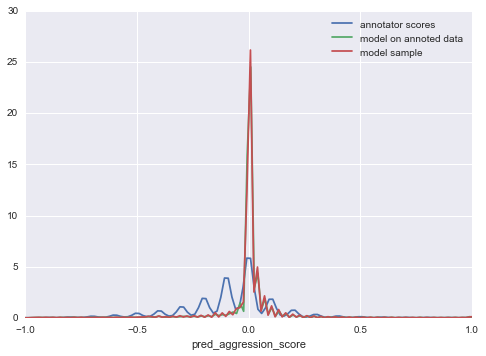

In [5]:
# annotations
sns.distplot(d['annotated']['aggression_score'].dropna(), hist=False, label = 'annotator scores')

# model on annotated data
sns.distplot(d['annotated']['pred_aggression_score'].dropna(), hist=False, label = 'model on annoted data')

#model no admin sample
sns.distplot(d['sample']['pred_aggression_score'].dropna(), hist=False, label = 'model sample')

plt.xlim(-1, 1)
plt.legend()

### Q: How does the distribution over attack probabilities compare across annotators vs models and different data sets

This is mainly a sanity check that the attack model is working new data

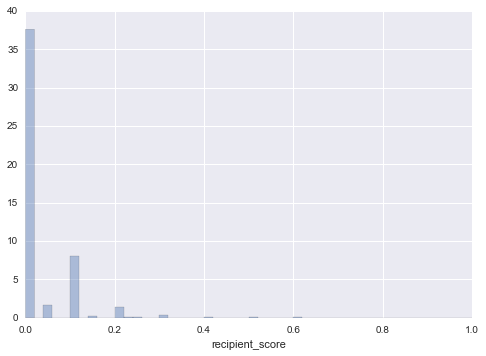

In [6]:
sns.distplot(d['annotated']['recipient_score'].dropna(), kde =False, norm_hist = True)

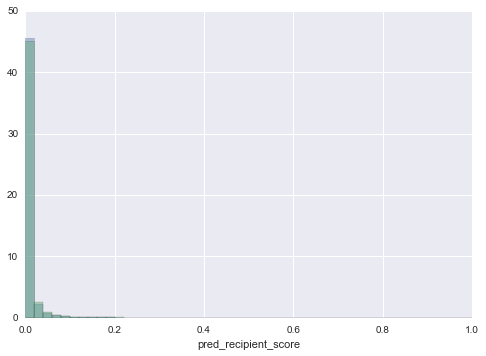

In [7]:
sns.distplot(d['annotated']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)
sns.distplot(d['sample']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)